# Исследование рынка компьютерных игр

**Цель проекта**  
На основе данных из открытых источников выявить закономерности, определяющие успешность игр, а также проверить гипотезы. Исследование позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**  
1. Загрузка данных, общая информация.
2. Предобработка данных, в т.ч.: корректировка названий столбцов, преобразование типов данных, проверка и обработка пропусков, добавление вспомогательных расчетных данных. 
3. Исследовательский анализ данных, в т.ч.: 
 * Изучение количества выпускаемых игр в разные годы.
 * Изменение продаж по платформам, выявление наибольшее успешных, определение срока жизни платформ.
 * Определение актуального периода для прогнозирования.
 * Изучение поведения платформ.
 * Изучение влияния на продажи внутри одной платформы отзывы пользователей и критиков. 
 * Изучение распределения игр по жанрам. 
4. Составление портрета пользователя каждого региона (NA, EU, JP), в т.ч.:
 * Самые популярные платформы (топ-5);
 * Самые популярные жанры (топ-5);
 * Влияние рейтинга ESRB на продажи в отдельном регионе.
5. Проверка гипотез:
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Общий вывод.

## Загрузка данных, общая информация

In [1]:
# Импортируем библиотеки
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# открываем файл, сохраняем в датафрейм
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10074,MLB 13: The Show,PSV,2013.0,Sports,0.10,0.00,0.00,0.02,75.0,7.5,E
2742,Final Fantasy XIV: A Realm Reborn,PS4,2014.0,Role-Playing,0.33,0.23,0.08,0.11,NaN,NaN,NaN
9292,Call of Duty: Infinite Warfare,PC,2016.0,Shooter,0.04,0.08,0.00,0.01,73.0,3,M
7921,Conflict: Denied Ops,PS3,2008.0,Shooter,0.05,0.10,0.00,0.03,51.0,3.1,M
12221,Port Royale 3,X360,NaN,Simulation,0.06,0.00,0.00,0.01,56.0,4.5,T
2049,Ninja Gaiden II,X360,2008.0,Action,0.65,0.22,0.05,0.10,81.0,8,M
8425,Sudoku Gridmaster,DS,2006.0,Puzzle,0.13,0.02,0.00,0.01,62.0,tbd,E
1665,Medal of Honor: Airborne,PS3,2007.0,Shooter,0.25,0.69,0.03,0.25,75.0,7.6,T
13531,World Championship Spelling,DS,2010.0,Misc,0.04,0.00,0.00,0.00,NaN,tbd,E
8869,X-Men: The Official Game,GC,2006.0,Action,0.12,0.03,0.00,0.00,50.0,6.3,T


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data_shape = games.shape[0]
data_shape

16715

**Вывод:**  
В датафрейме 16715 строк. Есть пропуски, есть пока непонятное значение 'tbd'. Названия столбцов надо привести к единому нижнему регистру. У некоторых столбцов (Year_of_Release, user_score) неверный тип данных.

## Предобработка данных

### Названия столбцов

In [7]:
# посмотрим названия столбцов
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
# приведем все к нижнему регистру 
games.columns = games.columns.str.lower()
# проверка
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
# приведем к единому нижнему регистру содержимое категориальных столбцов
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating'] = games['rating'].str.lower()

### Пропуски, типы данных, аномалии

In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

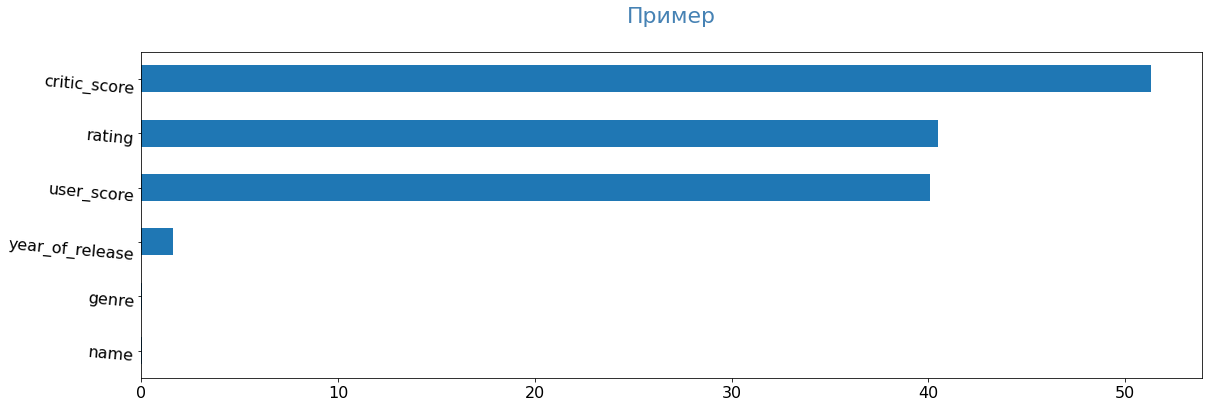

In [11]:
pass_value_barh(games)

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Несоответствие типов данных:  
* `year_of_release` - год выпуска должен быть целочисленным
* `user_score` - оценка пользователей, сейчас тип object, надо - float.

In [13]:
# подсчет количества пропущенных значений в каждой категории данных
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Столбец name**

In [14]:
# строки с пропусками в названии
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких строк всего 2, при этом в этих строках также пропуски в столбцах с жанром и рейтингами. Можно смело удалять.

In [15]:
# удаляем строки с пропусками в названии
games = games.dropna(subset = ['name'])

In [16]:
len(games['name'].unique())

11559

Названий много.

**Столбец year_of_release**

In [17]:
# посмотрим уникальные значения в столбце
games.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [22]:
# check
# жизненный срок платформы

years_of_life = games.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3do,1994.0,1995.0,1.0
3ds,2011.0,2016.0,5.0
dc,1998.0,2008.0,10.0
ds,1985.0,2013.0,28.0
gb,1988.0,2001.0,13.0
gba,2000.0,2007.0,7.0
gc,2001.0,2007.0,6.0
gen,1990.0,1994.0,4.0


Если бы пропусков с годом выпуска было мало, можно было бы прогуглить год выпуска по названию и заполнить, но их прилично, будет слишком трудоемко. 
По таблицам видно, что частично пропуски можно заполнить по совпадающим названиям игр. Для этого сначала отберем игры без пропусков, создадим функцию и заменим пропуски.

In [27]:
games[games['year_of_release'].isna()]['platform'].value_counts()

wii     34
ps2     34
ds      30
x360    30
ps3     25
xb      21
2600    17
pc      17
psp     16
gc      14
gba     11
3ds      8
ps       7
n64      3
psv      1
gb       1
Name: platform, dtype: int64

Т.к. количество строк с пропусками в годе выпуска невелико по сравнению с общим количеством строк и большая часть это пропуски по устаревшим платформам, эти строки можно удалить.

In [28]:
games = games.dropna(subset = ['year_of_release'])
# проверка
games['year_of_release'].isna().sum()

0

In [30]:
# # удаляем строки с пропусками
# games = games.dropna(subset = ['year_of_release'])
# меняем тип в столбце на целочисленный
games['year_of_release'] = games['year_of_release'].astype('int')
# games.isna().sum()

**Столбец genre**

In [31]:
games['genre'].isna().sum()

0

Пропуски были, видимо, в ранее удаленных строках.

In [32]:
# посмотрим  значения столбца
games['genre'].value_counts()

action          3307
sports          2306
misc            1721
role-playing    1481
shooter         1296
adventure       1293
racing          1226
platform         878
simulation       857
fighting         837
strategy         673
puzzle           569
Name: genre, dtype: int64

Самые популярные - action и sports, каких-то некорректных данных нет.

**Столбец platform**

In [33]:
# посмотрим  значения столбца
games['platform'].value_counts()

ps2     2127
ds      2121
ps3     1306
wii     1286
x360    1232
psp     1193
ps      1190
pc       957
gba      811
xb       803
gc       542
3ds      512
psv      429
ps4      392
n64      316
xone     247
snes     239
sat      173
wiiu     147
2600     116
nes       98
gb        97
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64

Для того, кто не играет, 95% аббревиатур выглядят пока загадочно, конечно. Предположим, что это все на самом деле такие игровые платформы и тут все ок.

**Столбцы с продажами: na_sales, eu_sales, jp_sales, other_sales**

In [34]:
games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16444.000000,16444.000000,16444.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594
std,0.818378,0.506716,0.311100,0.188005
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


По каждому из столбцов минимальное значение - 0. Посмотрим примеры таких строк.

In [35]:
# продажи по Северной Америке нулевые:
games[games['na_sales'] == games['na_sales'].min()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15158,cities xl 2011,pc,2010,simulation,0.0,0.02,0.00,0.00,70.0,5.7,e
11057,the x-factor,x360,2010,misc,0.0,0.08,0.00,0.01,NaN,NaN,NaN
15121,supermodel makeover by lauren luke,ds,2009,simulation,0.0,0.02,0.00,0.00,NaN,NaN,NaN
15445,saki: achiga-hen portable,psp,2013,adventure,0.0,0.00,0.02,0.00,NaN,NaN,NaN
16652,fast racing neo,wiiu,2016,action,0.0,0.01,0.00,0.00,81.0,8.5,e
14932,wand of fortune 2: jikuu ni shizumu mokushiroku,psp,2011,adventure,0.0,0.00,0.03,0.00,NaN,NaN,NaN
10079,super run for money tousouchuu atsumare! saiky...,3ds,2015,action,0.0,0.00,0.11,0.00,NaN,NaN,NaN
15846,zero no tsukaima: muma ga tsumugu yokaze no no...,ps2,2007,adventure,0.0,0.00,0.02,0.00,NaN,NaN,NaN
15722,mary king's riding school,ds,2008,simulation,0.0,0.02,0.00,0.00,NaN,NaN,NaN
10960,ghostbusters: the video game (ds version),pc,2010,action,0.0,0.08,0.00,0.01,NaN,NaN,NaN


При нулевых продажах по Северной Америке, продажи хотя бы в одном из других регионов не нулевые. Проверим, нет ли строк с нулевыми продажами по всем рынкам.

In [36]:
# посмотрим строки, где продажи на всех рынках равны нулю
games[(games['na_sales'] == 0) & (games['eu_sales'] == 0) & (games['jp_sales'] == 0) & (games['other_sales'] == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,g1 jockey 4 2008,ps3,2008,sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,score international baja 1000: the official game,ps2,2008,racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Таких строк две, можно смело удалить.

In [37]:
# удаляем
games = games.query('(na_sales != 0) or (eu_sales != 0) or (jp_sales != 0) or (other_sales !=0)')
# games.info()

**Столбцы critic_score, user_score**

In [38]:
# оценка пользователей
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков, присутствуют нулевые оценки пользователей, а значит пропуски заполним не нулями, а, например, -1. Также встречается аббревиатура 'tbd', которая имеет несколько расшифровок, но т.к. в данном случае речь идет об играх, расшифровкой будет 'to be determined' - будет определено'. По сути это то же самое, что и неизвестное значение. Поэтому, можно смело заменить значение 'tbd' на 'NaN', а потом уже все Nan на -1. Заполнение какими-либо расчетными данными считаю некорректным.

In [39]:
# меняем tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)
# заполняем все пропуски нулями
games['user_score'] = games['user_score'].fillna(-1)
# меняем формат на float
games['user_score'] = games['user_score'].astype('float')

In [40]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Пропуски в графе critic_score есть как по старым играм, так и по относительно современным. Чтобы не было путаницы с возможными нулевыми оценками, как и в случае с user_score заполним пропуски -1. Заполнение какими-либо расчетными данными считаю некорректным.

In [41]:
#games[games['critic_score'].isna()].sample(10)

In [42]:
# заполняем пропуски нулями
games['critic_score'] = games['critic_score'].fillna(-1)

**Столбец rating**

In [43]:
games['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [44]:
games['rating'].value_counts()

e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
ao         1
rp         1
Name: rating, dtype: int64

Понятно, что ничего не понятно. Гугл подсказывает, что на данный момент существуют следующие актуальные рейтинги игр: 
* *«EC» («Early childhood»)* — «Для детей младшего возраста».
* *«E» («Everyone»)* — «Для всех» (Первоначально "K-A" ("Kids to Adults"))
* *«E10+» («Everyone 10 and older»)* — «Для всех от 10 лет и старше».
* *«T» («Teen»)* — «Подросткам».
* *«M» («Mature»)* — «Для взрослых».
* *«AO» («Adults Only 18+»)* — «Только для взрослых».
* *«RP» («Rating Pending»)* — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. 
* *«RP 17+» («Rating Pending»)* — «Рейтинг ожидается - примерно 17+»  

Таким образом, 'K-A' можно переименовать в 'E'.

In [45]:
games['rating'] = games['rating'].replace('K-A', 'E', regex=True)

In [46]:
games[games['rating'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16623,norn + nonette: act tune,psv,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
9725,m&m's kart racing,ds,2008,racing,0.11,0.00,0.00,0.01,-1.0,-1.0,NaN
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NaN
4191,fifa 12,pc,2011,sports,0.04,0.33,0.00,0.10,-1.0,-1.0,NaN
1222,mortal kombat 3,snes,1994,fighting,1.19,0.29,0.00,0.05,-1.0,-1.0,NaN


Рейтинг отсутствует как у старых игр, так и у относительно новых. Возможно, по каким-то причинам он просто не присваивался игре. Заполним пропуски на undefined.

In [47]:
games['rating'] = games['rating'].fillna('undefined')

In [48]:
# проверка на явные дубликаты
print('Количество явных дубликатов:', games.duplicated().sum())

Количество явных дубликатов: 0


In [49]:
# Проверим дубликаты по столбцам: name, platform, year_of_release

display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,e
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,e


In [50]:
# удаляем
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first') 
# проверка
# display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

In [51]:
games['critic_score'] = games['critic_score'].astype('int')

In [52]:
# проверка данных после предобработки
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     16441 non-null  int64  
 9   user_score       16441 non-null  float64
 10  rating           16441 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Добавление данных о суммарных продажах

In [53]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1445,fifa soccer 08,x360,2007,sports,0.31,0.89,0.01,0.14,82,7.9,e,1.35
11365,metal slug advance,gba,2004,shooter,0.06,0.02,0.00,0.00,79,8.3,t,0.08
8591,create,ps3,2010,action,0.11,0.03,0.00,0.02,61,5.2,e,0.16
4727,nights: journey of dreams,wii,2007,platform,0.32,0.02,0.04,0.03,69,8.5,e,0.41
7969,the bee game,ds,2007,adventure,0.17,0.00,0.00,0.01,-1,-1.0,e,0.18
10692,harvey birdman: attorney at law,psp,2008,adventure,0.09,0.00,0.00,0.01,62,8.0,t,0.10
10805,steel battalion,xb,2002,simulation,0.05,0.02,0.02,0.00,83,8.5,t,0.09
7771,lego marvel's avengers,3ds,2016,action,0.07,0.09,0.01,0.01,60,7.1,e10+,0.18
4298,ncaa gamebreaker 99,ps,1998,sports,0.25,0.17,0.00,0.03,-1,-1.0,undefined,0.45
6015,prince of persia: rival swords,wii,2007,action,0.24,0.02,0.00,0.02,70,7.7,t,0.28


**Вывод:**  
Была проведена предобработка данных: 
* скорректированы типы данных; 
* обработаны пропуски: частично заполнены, частично удалены. Пропуски могли возникнуть по многим причинам, например: играм не присваивался рейтинг и оценки, техничская ошибка и прочее.
* Данные в столбце с рейтингами скорректированы в соответствии с актуальной категоризацией.
* Данные проверены на наличие дубликатов (отсутствуют).
* Добавлен столбец с суммарными продажами во всех регионах.

## Исследовательский анализ данных

### Выпуск игр по годам

In [54]:
colors = sns.color_palette('pastel')

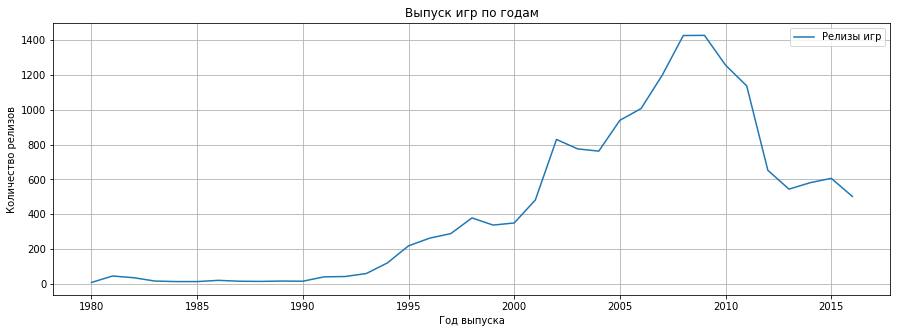

In [55]:
# строим диаграмму
plt.figure(figsize=(15,5))
plt.plot(games.groupby('year_of_release')['name'].count(), label='Релизы игр')
#plt.plot(games.groupby('year_of_release')['total_sales'].sum(), label='Продажи')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.title('Выпуск игр по годам')
plt.grid()

In [56]:
#len(games[games['year_of_release'] == 2009])

**Вывод:**  
Из графика видно, что, до 95 года количество игр было небольшим. С начала 90-х годов количество начинает расти. В 2000-х годах наступает расцвет видеоигр, резкий скачок заметен в районе 2002-2003 гг. Пик в 2008-2009 гг, количество релизов превышает 1400 ед. После начинается спад, связанный с развитием мобильных устройств и соцсетей, что ведет к снижению интереса к играм, соответственно, снижается и их производство. Также, возможной причиной является то, что игры стали делать более проработанными, что ведет к увеличению срока их производства (и снижению частоты выпуска).



### Статистика по платформам

Посмотрим, как менялись продажи по платформам. Для этого сформируем сводную таблицу с суммарными продажами, построим диаграмму.

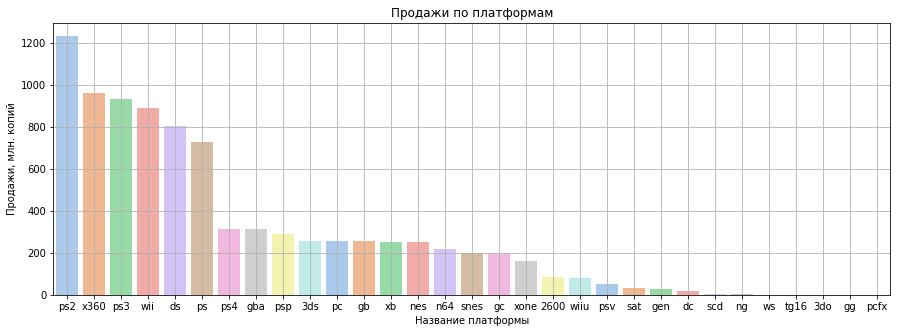

In [57]:
# сводная таблица
platform_pivot = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                                    .sort_values(by='total_sales', ascending=False).reset_index()
platform_pivot.columns = ['platform', 'total_sales']
# график
plt.figure(figsize=(15, 5))
sns.barplot(x=platform_pivot['platform'], y=platform_pivot['total_sales'], palette=colors)
# plt.legend()
plt.title('Продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Продажи, млн. копий')
plt.grid()
plt.show()

In [58]:
platform_pivot.head(10)

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.33
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


В лидерах по суммарным продажам - 6 платформ (PS2, X360, PS3, Wii, DS, PS), дальше - резкий спад.

In [59]:
# сохраним в отдельный список названия платформ с наибольшыми продажами
platform_top_sales = platform_pivot['platform'].head(6)
platform_top_sales

0     ps2
1    x360
2     ps3
3     wii
4      ds
5      ps
Name: platform, dtype: object

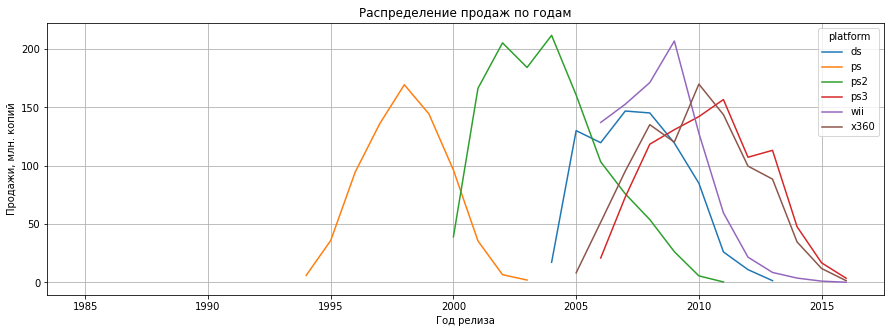

In [60]:
# построим график с продажами по годам для отобранных платформ
games.query('platform in @platform_top_sales')\
            .pivot_table(index='year_of_release', columns='platform',\
                         values='total_sales', aggfunc='sum')\
            .plot(figsize = (15,5))
plt.title('Распределение продаж по годам')
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн. копий')
plt.grid()
plt.show()

**Вывод:**  
Как видно из графиков, средний срок жизни платформы - в районе 10 лет. При это "лидеры" по продажам к концу 2015 года уже отжили свое, продажи ушли в нули.

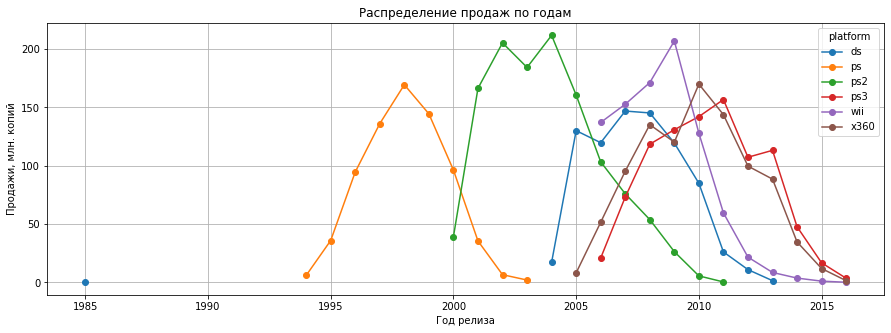

In [61]:
# check

games.query('platform in @platform_top_sales')\
            .pivot_table(index='year_of_release', columns='platform',\
                         values='total_sales', aggfunc='sum')\
            .plot(figsize = (15,5), style='-o')
plt.title('Распределение продаж по годам')
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн. копий')
plt.grid();

In [62]:
games[(games['platform'] == "ds") & (games['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,-1,-1.0,undefined,0.02


Тут явно некорректные данные, платформа ds появилась в 2004. Удаляем.

In [63]:
games = games.query('name != "strongest tokyo university shogi ds"')
# games[(games['name'] == "strongest tokyo university shogi ds")]

### Актуальный период и потенциально прибыльные платформы

Ранее мы определили, что средний срок жизни игровой платформы - в районе 10 лет. Необходимо выбрать актуальный период - период, за который будут оцениваться данные с целью построения предсказательной модели на 2017 год. Нас точно не интересуют платформы, продаж и релизов для которых не было в последний год.  
Платформы старше 10 лет "скорее мертвы, чем живы", продажи для них либо вообще будут отсуствовать, либо будут минимальны и стремиться к нулю.   

С учетом динамично развивающейся индустрии комьютерных игр для прогнозирования продаж следует взять период 2-3 года, например с 2014 года.

In [64]:
# len(games.query('year_of_release == 2016'))

In [65]:
# отбираем платформы с годом выпуска с 2012
games_actual = games.query('year_of_release >= 2014') 

In [66]:
#games_actual['platform'].value_counts()

In [67]:
print('Количество платформ, выпущенных с 2014 г.:', len(games_actual['platform'].unique()))

Количество платформ, выпущенных с 2014 г.: 10


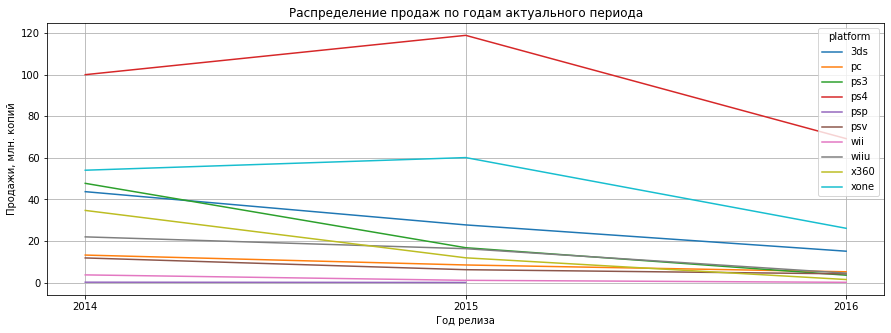

In [68]:
# построим график с данными по продажам по всем отобранным платформам
games_actual.pivot_table(index='year_of_release', columns = 'platform',\
                                 values='total_sales', aggfunc='sum')\
                                .plot(figsize=(15, 5))
plt.title('Распределение продаж по годам актуального периода')
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн. копий')
plt.xticks(np.arange(2014, 2017, 1))

plt.grid()
plt.show();

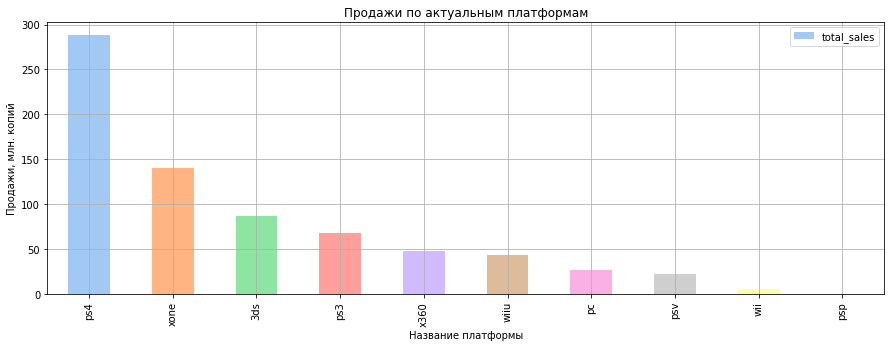

In [69]:
(games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                     .sort_values(by='total_sales', ascending=False).reset_index()\
                     .plot(kind='bar', x='platform', y='total_sales', figsize=(15, 5), color=colors)
)
plt.legend()
plt.title('Продажи по актуальным платформам')
plt.xlabel('Название платформы')
plt.ylabel('Продажи, млн. копий')
plt.grid()
plt.show()

**Вывод:**  
Из двух графиков видно, что лидируют по продажам PS4 и XONE. Высокие продажи у PS3, X360, но они уже начали снижаться. В целом, практически все платформы находятся в стадии снижения показателей. 
Таким образом, потенциально прибыльными платформами можем считать: PS4, XONE, 3DS, а также PC как самую долгоживущую платформу. 

### Глобальные продажи игр в разбивке по платформам

Построим график **«ящик с усами»** по глобальным продажам игр в разбивке по платформам.


In [70]:
# создадим список актуальных платформ
actual_platforms = ['ps4', 'xone', '3ds', 'pc', 'wiiu']

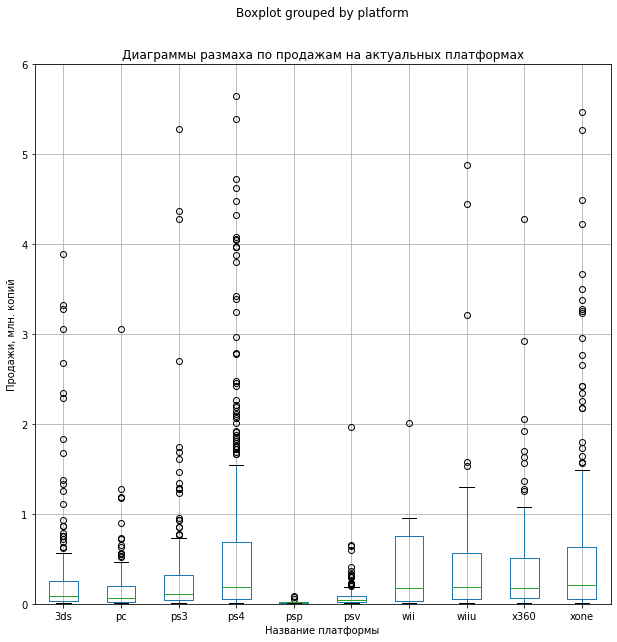

In [71]:
(games_actual[['platform', 'name', 'total_sales']]
        #.query('platform in @actual_platforms')[['platform', 'name', 'total_sales']]
         .boxplot(column='total_sales', by='platform', figsize=(10, 10))
)
plt.xlabel('Название платформы')
plt.ylabel('Продажи, млн. копий')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 6)
plt.show();

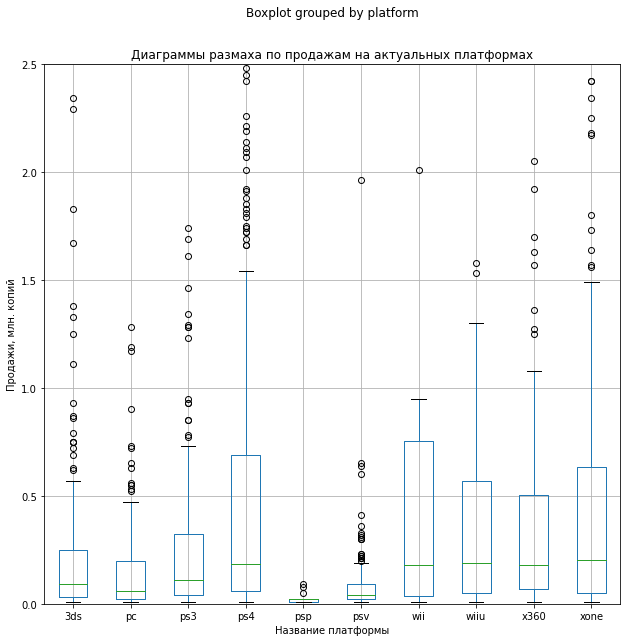

In [72]:
# диаграмма размаха с увеличенным масштабом
(games_actual[['platform', 'name', 'total_sales']]
             .boxplot(column='total_sales', by='platform', figsize=(10, 10))
)
plt.xlabel('Название платформы')
plt.ylabel('Продажи, млн. копий')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 2.5)
plt.show();

In [73]:
# посмотрим статистики по платформам
(games_actual
    #.query('platform in @actual_platforms')\
    .pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'min', 'max', 'count'])\
    .sort_values(('median', 'total_sales'), ascending=False).T
)

,platform,xone,wiiu,ps4,wii,x360,ps3,3ds,pc,psv,psp
sum,total_sales,140.360000,42.980000,288.150000,5.070000,48.220000,68.180000,86.680000,27.050000,22.400000,0.360000
mean,total_sales,0.615614,0.588767,0.766356,0.460909,0.434414,0.311324,0.408868,0.179139,0.075932,0.027692
median,total_sales,0.205000,0.190000,0.185000,0.180000,0.180000,0.110000,0.090000,0.060000,0.040000,0.020000
std,total_sales,1.046513,1.161467,1.614969,0.625451,0.628967,0.633059,1.188368,0.329359,0.141591,0.027735
min,total_sales,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
max,total_sales,7.390000,7.090000,14.630000,2.010000,4.280000,5.270000,11.680000,3.050000,1.960000,0.090000
count,total_sales,228.000000,73.000000,376.000000,11.000000,111.000000,219.000000,212.000000,151.000000,295.000000,13.000000


**Вывод:**  
В целом продажи не превышают 1 млн. копий, но есть выбросы - продажи свыше 5 млн. копий. Данные выбросы допустимы, т.к. на каждой платформе, например, могут быть уникальные/эксклюзивные игры. Или игры которы продаются именно на этой платформе лучше.  
Заметно, что практически у всех платформ большая часть значений больше медианного. У платформ WiiU, XONE, PS4 медиана находится в районе значения 0.2-0,22. Наиболее длинный ряд упешно продающихся игр у PS4 и XONE, WIIU.

### Влияние  отзывов пользователей и критиков на продажи

Рассмотрим влияние отзывов пользователей и критиков на продажи на примере самой популярной платформы - PS4.

In [74]:
# из датафрейма с данными об актуальных продажах уберем все строки 
# с оценками пользователей и критиков равными -1
# и оставим только данные по играм на ps4
ps4 = games_actual.query('(platform == "ps4") and ((user_score != -1) or (critic_score != -1))')
ps4.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12476,earth defense force 4.1: the shadow of new des...,ps4,2015,shooter,0.03,0.02,0.00,0.01,64,7.9,m,0.06
15734,prototype: biohazard bundle,ps4,2016,action,0.01,0.00,0.00,0.00,48,2.0,m,0.01
1775,wwe 2k15,ps4,2014,sports,0.39,0.57,0.00,0.19,62,5.1,t,1.15
305,batman: arkham knight,ps4,2015,action,1.53,1.69,0.10,0.64,87,7.6,m,3.96
539,mortal kombat x,ps4,2015,fighting,1.50,0.80,0.00,0.48,83,7.7,m,2.78
7407,the wolf among us,ps4,2014,adventure,0.10,0.07,0.00,0.04,83,8.4,m,0.21
8367,bladestorm: nightmare,ps4,2015,action,0.08,0.04,0.03,0.02,58,6.5,t,0.17
2815,lego dimensions,ps4,2015,action,0.24,0.37,0.00,0.12,80,7.1,e10+,0.73
5989,uefa euro 2016,ps4,2016,sports,0.00,0.22,0.04,0.04,72,6.6,e,0.30
13729,rugby challenge 3,ps4,2016,sports,0.00,0.04,0.00,0.01,64,6.8,e,0.05


In [75]:
#ps4.shape[0]

In [76]:
ps4[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,245.000000,245.000000
mean,69.775510,6.732245
std,17.722665,1.636288
min,-1.000000,-1.000000
25%,65.000000,6.100000
50%,73.000000,7.100000
75%,80.000000,7.800000
max,97.000000,9.200000


Построим диаграммы рассеяния.

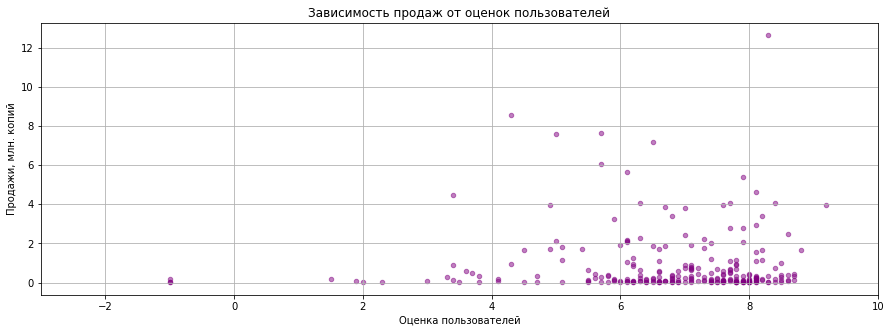

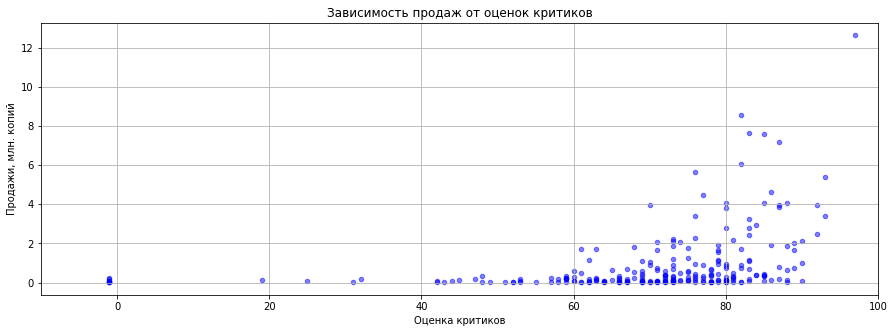

In [77]:
# график зависимости продаж от оценок пользователей
ps4.plot(x='user_score', y='total_sales', kind='scatter', style='o', alpha=0.5, figsize=(15,5), grid=True, c='purple')
plt.xlim(-3, 10)
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн. копий')
plt.show()

# график зависимости продаж от оценок критиков
ps4.plot(x='critic_score', y='total_sales', kind='scatter', style='o', alpha=0.5, figsize=(15,5), grid=True, c='blue')
plt.xlim(-10, 100)
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн. копий')
plt.show()

По графикам видно, что в основном оценки пользователей составляют 6-8 баллов по 10-балльной шкале, оценки критиков - 70-80 по 100-балльной шкале.


In [78]:
# построим матрицу корреляций для исследуемых параметров
ps4_corr = ps4[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score']].corr()
ps4_corr.style.format("{:.3}").background_gradient(cmap='twilight')

,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
na_sales,1.0,0.716,0.572,0.917,0.894,0.346,0.0172
eu_sales,0.716,1.0,0.545,0.935,0.952,0.287,-0.0293
jp_sales,0.572,0.545,1.0,0.602,0.623,0.325,0.175
other_sales,0.917,0.935,0.602,1.0,0.998,0.341,-0.00753
total_sales,0.894,0.952,0.623,0.998,1.0,0.34,-0.0043
critic_score,0.346,0.287,0.325,0.341,0.34,1.0,0.322
user_score,0.0172,-0.0293,0.175,-0.00753,-0.0043,0.322,1.0


In [79]:
print('Корреляция между оценкой пользователей и мировыми продажами:', round(ps4['user_score'].corr(ps4['total_sales']), 3))
print('Корреляция между оценкой критиков и мировыми продажами:', round(ps4['critic_score'].corr(ps4['total_sales']), 3))

Корреляция между оценкой пользователей и мировыми продажами: -0.004
Корреляция между оценкой критиков и мировыми продажами: 0.34


**Вывод:**  
На примере ps4 определили, что оценки пользователей никак не влияют на мировые продажи (продажи в "регионах" тоже), коэффициент корреляции составил -0,004. Некоторая зависимость между мировыми продажами и оценками критиков есть, но скорее слабая (слабоположительная). 

Соотнесем выводы с продажами игр на **других платформах (XOne, 3DS, PC, WiiU)**.

In [80]:
for p in ['xone', '3ds', 'pc', 'wiiu']:
    print('Платформа', p)
    data = games_actual.query('platform == @p')
    print(f'Корреляция между оценкой критиков и продажами: {data.critic_score.corr(data.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {data.user_score.corr(data.total_sales):.2}')
    print('--' * 10)

Платформа xone
Корреляция между оценкой критиков и продажами: 0.27
Корреляция между оценкой пользователей и продажами: 0.11
--------------------
Платформа 3ds
Корреляция между оценкой критиков и продажами: 0.053
Корреляция между оценкой пользователей и продажами: 0.053
--------------------
Платформа pc
Корреляция между оценкой критиков и продажами: 0.18
Корреляция между оценкой пользователей и продажами: 0.069
--------------------
Платформа wiiu
Корреляция между оценкой критиков и продажами: 0.29
Корреляция между оценкой пользователей и продажами: 0.25
--------------------


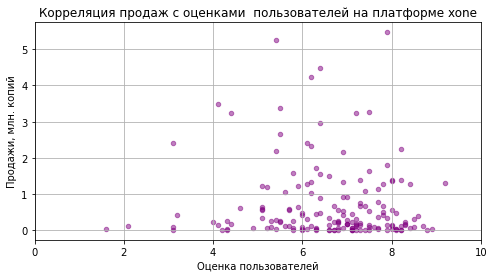

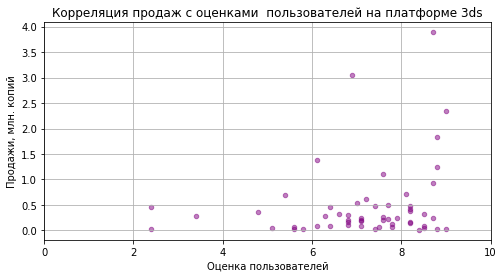

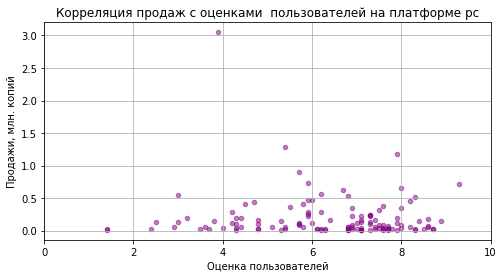

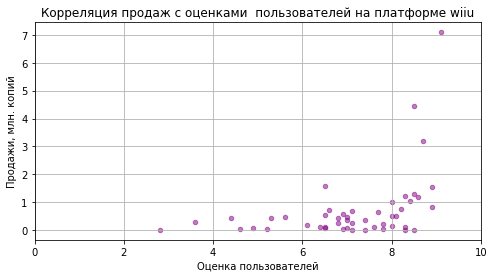

In [81]:
for p in ['xone', '3ds', 'pc', 'wiiu']:
    data = games_actual.query('(platform == @p) and ((user_score != -1) or (critic_score != -1))')
    data.plot(x='user_score', y='total_sales', kind='scatter', style='o', alpha=0.5, figsize=(8,4), grid=True, c='purple')
    plt.xlim(0, 10)
    plt.title(f'Корреляция продаж с оценками  пользователей на платформе {p}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи, млн. копий')
    plt.show();

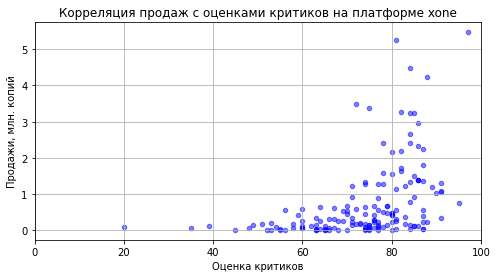

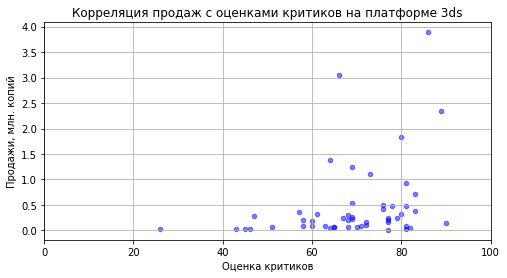

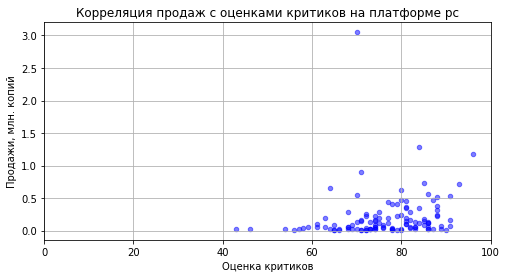

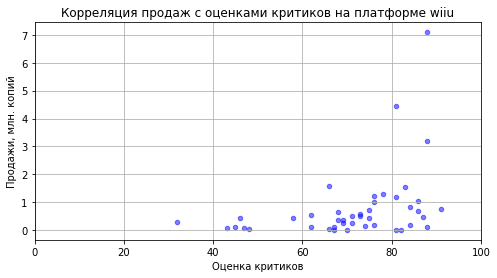

In [82]:
for p in ['xone', '3ds', 'pc', 'wiiu']:
    data = games_actual.query('(platform == @p) and ((user_score != -1) or (critic_score != -1))')
    data.plot(x='critic_score', y='total_sales', kind='scatter', style='o', alpha=0.5, figsize=(8,4), grid=True, c='blue')
    plt.xlim(0, 100)
    plt.title(f'Корреляция продаж с оценками критиков на платформе {p}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи, млн. копий')
    plt.show();


**Вывод:**  
Расчеты и диаграммы рассеяния показывают, что выявленные ранее тенденции (отсутствие зависимости продаж от оценок пользователей и слабая зависимость между продажами и оценками критиков) применимы и к остальным платформам. Причем здесь влияние оценок критиков еще меньше.

### Распределение игр по жанрам

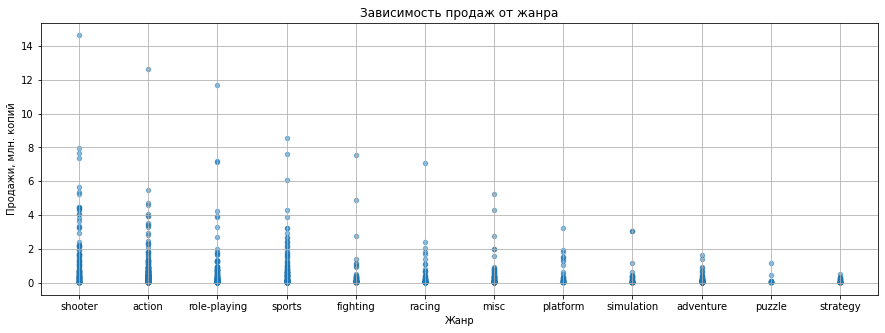

In [83]:
games_actual.plot(x='genre', y='total_sales', kind='scatter', grid=True, figsize=(15, 5), alpha=0.5);
plt.title('Зависимость продаж от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн. копий')
plt.show()

In [84]:
# Сводная таблица с суммарными продажами по каждому жанру
genre_pivot = games_actual.pivot_table(index='genre', values=['total_sales', 'name'], aggfunc={'total_sales':'sum', 'name':'count'})\
                                .sort_values(by='total_sales', ascending=False).reset_index()
genre_pivot.columns = ['genre', 'count', 'total_sales']
genre_pivot

,genre,count,total_sales
0,action,619,199.36
1,shooter,128,170.94
2,sports,161,109.48
3,role-playing,221,101.44
4,misc,113,37.55
5,fighting,60,28.22
6,racing,69,27.52
7,platform,38,18.09
8,adventure,185,17.55
9,simulation,44,13.13


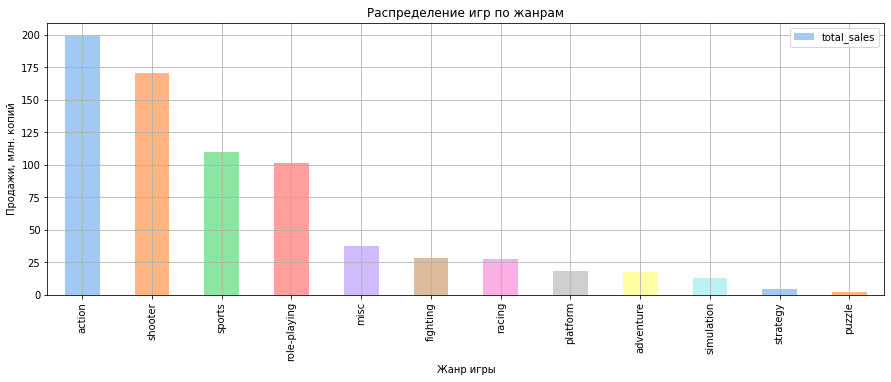

In [85]:
# строим график
genre_pivot.plot(kind='bar', y='total_sales', x='genre', color=colors, figsize=(15, 5))

plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи, млн. копий')
plt.grid()
plt.show();

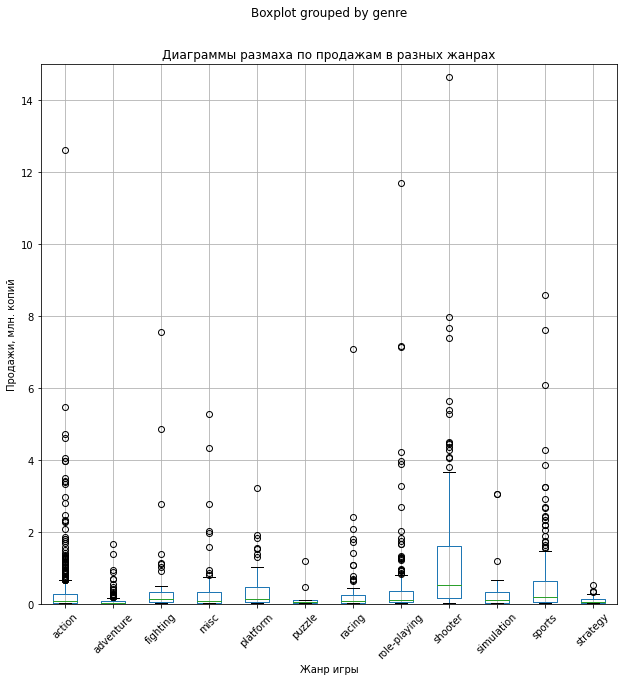

In [86]:
(games_actual[['genre', 'total_sales']]
             .boxplot(column='total_sales', by='genre', figsize=(10,10))
)
plt.xlabel('Жанр игры')
plt.ylabel('Продажи, млн. копий')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 15)
plt.xticks(rotation = 45)
plt.show();

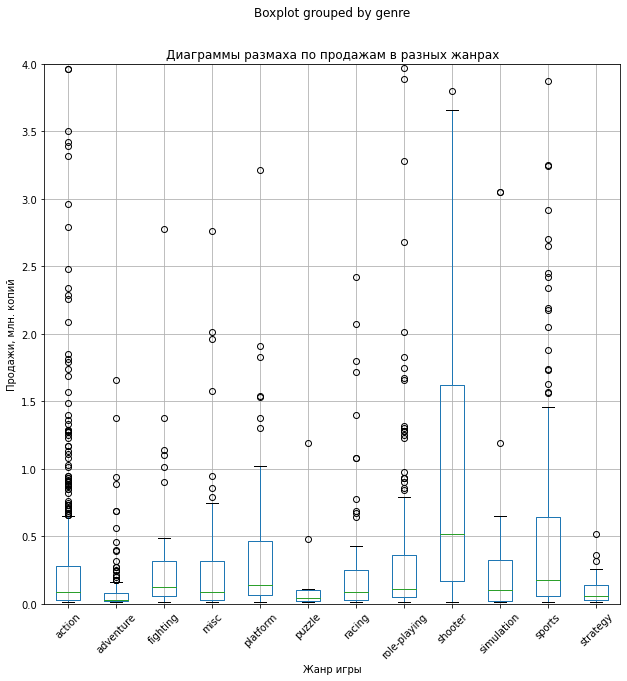

In [87]:
# крупнее 
(games_actual[['genre', 'total_sales']]
             .boxplot(column='total_sales', by='genre', figsize=(10,10))
)
plt.xlabel('Жанр игры')
plt.ylabel('Продажи, млн. копий')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 4)
plt.xticks(rotation = 45)
plt.show();

In [88]:
games_actual.groupby('genre')['total_sales'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
role-playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58
shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63
misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05


**Вывод:**  
На первом месте количеству релизов - игры в жанре Action, но по медианным продажам они скорее во второй половине списка. Шутеры - лидеры по продажам при том, что по количеству релизов они аж на 5 месте, у этого жанра самый длинный боксплот, можно считать, этот жанр наиболее успешным. 

## Портрет пользователя

Составим портрет пользователя для каждого региона: Северная Америка, Европа, Япония. Определим самые популярные платформы и жанры в регионах, влияние рейтинга ESRB на продажи в каждом из регионов.

### Самые популярные платформы (топ-5)

In [89]:
# сводная таблица по продажам в Северной Америке
na_sales = games_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).reset_index()

# сводная таблица по продажам в Европе
eu_sales = games_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).reset_index()

# сводная таблица по продажам в Японии
jp_sales = games_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).reset_index()
#display(na_sales, eu_sales, jp_sales)

#platforms = set(list(na_sales['platform']) + list(eu_sales['platform']) + list(jp_sales['platform']))

In [90]:
# # сохраним в отдельные списки топ5 платформ по каждому региону
# na_top5_platforms = list(na_sales['platform'].head())
# eu_top5_platforms = list(eu_sales['platform'].head())  
# jp_top5_platforms = list(jp_sales['platform'].head())              

In [91]:
# добавляем в каждую из таблиц столбец с типом платформы: из топ5 или other
na_sales['platform_type'] = na_sales['platform']
na_sales.loc[5:9, 'platform_type'] = 'other' 

eu_sales['platform_type'] = eu_sales['platform']
eu_sales.loc[5:9, 'platform_type'] = 'other' 

jp_sales['platform_type'] = jp_sales['platform']
jp_sales.loc[5:9, 'platform_type'] = 'other' 

In [92]:
display(na_sales, eu_sales, jp_sales)

,platform,na_sales,platform_type
0,ps4,98.61,ps4
1,xone,81.27,xone
2,x360,28.30,x360
3,3ds,22.64,3ds
4,ps3,22.05,ps3
5,wiiu,19.36,other
6,pc,7.23,other
7,psv,2.52,other
8,wii,2.08,other
9,psp,0.00,other


,platform,eu_sales,platform_type
0,ps4,130.04,ps4
1,xone,46.25,xone
2,ps3,25.54,ps3
3,pc,17.97,pc
4,3ds,16.12,3ds
5,x360,15.49,other
6,wiiu,13.15,other
7,psv,3.53,other
8,wii,2.59,other
9,psp,0.00,other


,platform,jp_sales,platform_type
0,3ds,44.24,3ds
1,ps4,15.02,ps4
2,psv,14.54,psv
3,ps3,11.22,ps3
4,wiiu,7.31,wiiu
5,psp,0.36,other
6,xone,0.32,other
7,x360,0.08,other
8,pc,0.00,other
9,wii,0.00,other


In [93]:
na_sales = na_sales.pivot_table(index='platform_type', values='na_sales', aggfunc='sum').reset_index()
na_sales.columns = ['platform_type', 'na_sales']

In [94]:
eu_sales = eu_sales.pivot_table(index='platform_type', values='eu_sales', aggfunc='sum').reset_index()
eu_sales.columns = ['platform_type', 'eu_sales']

In [95]:
jp_sales = jp_sales.pivot_table(index='platform_type', values='jp_sales', aggfunc='sum').reset_index()
jp_sales.columns = ['platform_type', 'jp_sales']

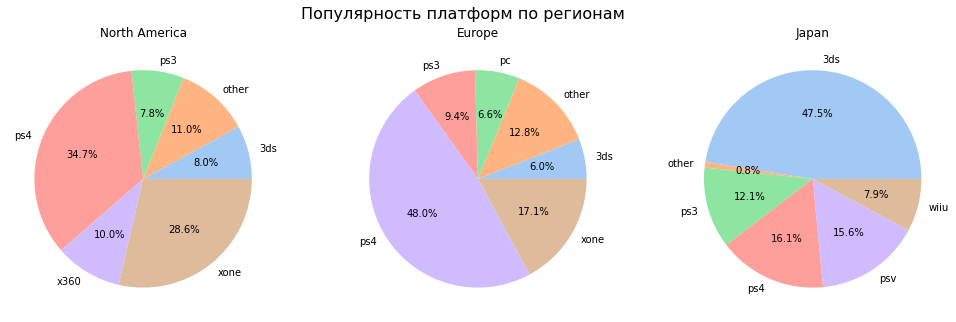

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# график Северная Америка
na_sales.plot(kind='pie', y='na_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[0], labels=na_sales['platform_type']).set(ylabel='')

# график Европа
eu_sales.plot(kind='pie', y='eu_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[1], labels=eu_sales['platform_type']).set(ylabel='')

# график Япония
jp_sales.plot(kind='pie', y='jp_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[2], labels=jp_sales['platform_type']).set(ylabel='')
plt.suptitle('Популярность платформ по регионам', fontsize=16)
axes[0].set_title('North America')
axes[1].set_title('Europe')
axes[2].set_title('Japan')
plt.show();

**Вывод:**  
* В регионе Северная Америка (NA) больше всего продаж у американской ps4 (34,7%), на втором месте - Xone (28,6%), на третьем X360 (10%).
* В Европе (EU) по продажам также лидирует PS4, но с большим перевесом 48% рынка, у Xone - 17.1%.
* В Японии с большим перевесом лидирует родная для их рынка - 3DS - 47,5% рынка.

### Самые популярные жанры (топ-5)

In [97]:
# Продажи в Северной Америке
na_genres = games_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).reset_index()

# Продажи в Европе
eu_genres = games_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).reset_index()


# Продажи в Японии
jp_genres = games_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).reset_index()    

# display(na_genres, eu_genres, jp_genres)
# top_genres = set(list(na_genres['genre']) + list(eu_genres['genre']) + list(jp_genres['genre']))

In [98]:
#display(na_genres, eu_genres, jp_genres)

In [99]:
# добавляем в каждую из таблиц столбец с типом платформы: из топ5 или other
na_genres['genre_type'] = na_genres['genre']
na_genres.loc[5:11, 'genre_type'] = 'other' 

eu_genres['genre_type'] = eu_genres['genre']
eu_genres.loc[5:11, 'genre_type'] = 'other' 

jp_genres['genre_type'] = jp_genres['genre']
jp_genres.loc[5:11, 'genre_type'] = 'other' 


In [100]:
na_genres = na_genres.pivot_table(index='genre_type', values='na_sales', aggfunc='sum').reset_index()
na_genres.columns = ['genre_type', 'na_sales']

eu_genres = eu_genres.pivot_table(index='genre_type', values='eu_sales', aggfunc='sum').reset_index()
eu_genres.columns = ['genre_type', 'eu_sales']

jp_genres = jp_genres.pivot_table(index='genre_type', values='jp_sales', aggfunc='sum').reset_index()
jp_genres.columns = ['genre_type', 'jp_sales']

# display(na_genres, eu_genres, jp_genres)
jp_genres

,genre_type,jp_sales
0,action,29.58
1,fighting,6.37
2,misc,5.61
3,other,15.50
4,role-playing,31.16
5,shooter,4.87


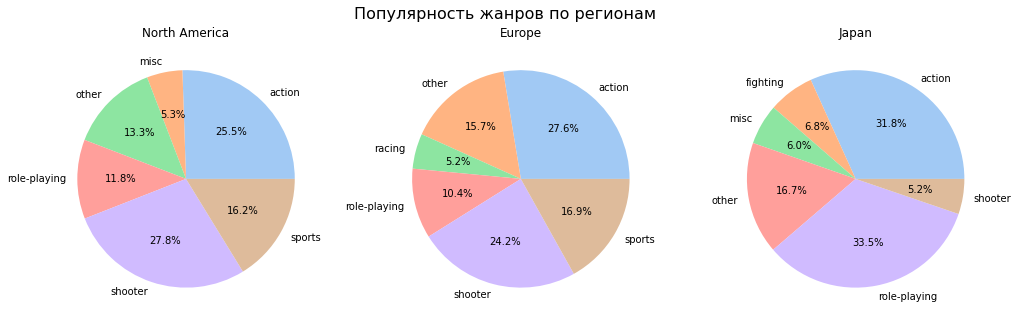

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# график Северная Америка
na_genres.plot(kind='pie', y='na_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[0], labels=na_genres['genre_type']).set(ylabel='')

# график Европа
eu_genres.plot(kind='pie', y='eu_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[1], labels=eu_genres['genre_type']).set(ylabel='')

# график Япония
jp_genres.plot(kind='pie', y='jp_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[2], labels=jp_genres['genre_type']).set(ylabel='')

plt.suptitle('Популярность жанров по регионам', fontsize=16)
axes[0].set_title('North America')
axes[1].set_title('Europe')
axes[2].set_title('Japan')
plt.show();

**Вывод:**  
* В Северной Америке лидируют жанры shooter и action, в Европе они же, но поменялись местами. На третьем месте в обоих регионах - sports. Показатели по первой тройке не существенно отличаются. А вот в Японии лидирует Role-Playing (33.5%), который в первых двух регионах в числе "отстающих" жанров. Action здесь на втором месте, почти 32%, а жанр sports, занимающий третье место в Северной Америке и Европе, в Японии вообще не попал в топ-5.

### Влияние рейтинга ESRB на продажи в регионах

In [102]:
# Северная Америка
na_rating = games_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales').reset_index()
# Европа
eu_rating = games_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales').reset_index()
# Япония
jp_rating = games_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales').reset_index()
ratings = set(list(na_rating['rating']) + list(eu_rating['rating']) + list(jp_rating['rating']))

In [103]:
#display(na_rating, eu_rating, jp_rating)

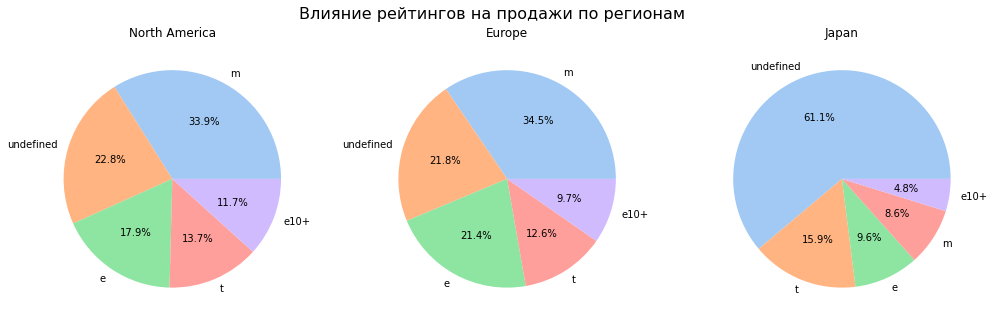

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# график Северная Америка
na_rating.plot(kind='pie', y='na_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[0], labels=na_rating['rating']).set(ylabel='')

# график Европа
eu_rating.plot(kind='pie', y='eu_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[1], labels=eu_rating['rating']).set(ylabel='')

# график Япония
jp_rating.plot(kind='pie', y='jp_sales',\
              colors = colors, autopct='%.1f%%', legend=False, ax=axes[2], labels=jp_rating['rating']).set(ylabel='')

plt.suptitle('Влияние рейтингов на продажи по регионам', fontsize=16)

axes[0].set_title('North America')
axes[1].set_title('Europe')
axes[2].set_title('Japan')
plt.show();

**Вывод:**  
* Северная Америка и Европа снова имеют примерно одинаковые показатели: преобладает рейтинг M ("Для взрослых"), что соотносится с самыми популярными жанрами: action и shooter. На втором месте игры с рейтингом "E" (для всех). 
* А вот в Японии больше половины это игры, которым не был присвоен рейтинг ESRB, в процессе предобработки данных этим играм был присвоен рейтинг "undefined". Причиной, вероятно, является то, что на японском рынке существует своя рейтинговая организация Computer Entertainment Rating Organization (CERO). При этом в Японии, вероятно, существует своя игровая индустрия, которая на мировом рынке не так распространена.

## Гипотезы

### Гипотеза о равенстве рейтингов платформ Xbox One и PC

**Сфорулируем нулевую и альтернативную гипотезы:**  
**H0:** Средние пользовательские рейтинги платформ Xbox One и PC равны.  
**H1:** Средние пользовательские рейтинги платформ Xbox One и PC не равны/отличаются.

In [105]:
# Зададим уровень статистической значимости в размере 5%
alpha = 0.05

In [106]:
# данные для проверки гипотезы
xone = games_actual[(games_actual['platform'] == 'xone') & (games_actual['user_score'] != -1)]['user_score']
pc = games_actual[(games_actual['platform'] == 'pc') & (games_actual['user_score'] != -1)]['user_score']

In [107]:
games_actual[(games_actual['platform'] == 'xone') & (games_actual['user_score'] != -1)]['year_of_release'].unique()

array([2014, 2015, 2016])

In [108]:
games_actual[(games_actual['platform'] == 'pc') & (games_actual['user_score'] != -1)]['year_of_release'].unique()

array([2014, 2015, 2016])

Перед проведением t-теста проверим гипотезу о равенстве дисперсий двух выборок.

In [109]:
test_leven, p = st.levene(xone, pc)

if p < alpha:
    print('Отвергаем гипотезу о равенстве дисперсий.')
else:
    print('Не получилось отвергнуть гипотезу о равенстве дисперсий.')

Отвергаем гипотезу о равенстве дисперсий.


Для проверки гипотезы о равенстве средних двух независимых выборок применим метод *scipy.stats.ttest_ind*.

In [110]:
print('Средний пользовательский рейтинг платформы Xbox One:', xone.mean().round(2))
print('Средний пользовательский рейтинг платформы PC:', pc.mean().round(2))

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")   

Средний пользовательский рейтинг платформы Xbox One: 6.59
Средний пользовательский рейтинг платформы PC: 6.3
p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу.


P-значение 0.116 означает, что вероятность получить такое или большее различие составляет 11,6%.

In [111]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


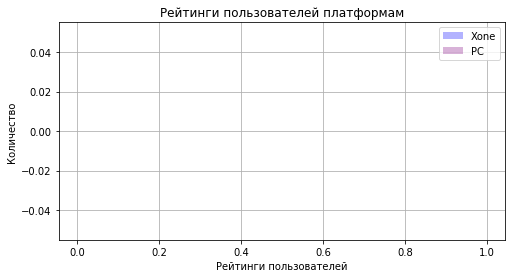

In [112]:
# график по оценкам платформы Xone
games_actual[(games_actual['platform'] == 'XOne') & (games_actual['user_score'] != -1)]['user_score']\
                .plot(kind='hist', bins=10, grid=True, alpha=0.3,\
                      rwidth=0.9, figsize=(8,4), color='blue', label='Xone')
# график по оценкам платформы PC
games_actual[(games_actual['platform'] == 'PC') & (games_actual['user_score'] != -1)]['user_score']\
                .plot(kind='hist', bins=10, grid=True, alpha=0.3,\
                      rwidth=0.9, figsize=(8,4), color='purple', label='PC')
plt.legend()
plt.title('Рейтинги пользователей платформам')
plt.xlabel('Рейтинги пользователей')
plt.ylabel('Количество')
plt.show()

**Вывод:**  
Не получилось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Расчетные данные также не опровергают нулевую гипотезу.

### Гипотеза о равенстве/неравенстве рейтингов жанров Action и Sports 


Сфорулируем нулевую и альтернативную гипотезы:  
**H0:** Средние пользовательские рейтинги жанров action и sports одинаковые(равны).  
**H1:** Средние пользовательские рейтинги жанров action и sports отличаются.


In [113]:
# данные для проверки гипотезы
action = games_actual[(games_actual['genre'] == 'action') & (games_actual['user_score'] != -1)]['user_score']
sports = games_actual[(games_actual['genre'] == 'sports') & (games_actual['user_score'] != -1)]['user_score']

Перед проведением t-теста проверим гипотезу о равенстве дисперсий двух выборок.

In [114]:
test_leven, p = st.levene(action, sports)

if p < alpha:
    print('Отвергаем гипотезу о равенстве дисперсий.')
else:
    print('Не получилось отвергнуть гипотезу о равенстве дисперсий.')

Отвергаем гипотезу о равенстве дисперсий.


Для проверки гипотезы о равенстве средних двух независимых выборок применим метод scipy.stats.ttest_ind.

In [115]:
print('Средний пользовательский рейтинг жанра Action:', action.mean().round(2))
print('Средний пользовательский рейтинг жанра Sports:', sports.mean().round(2))

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")   

Средний пользовательский рейтинг жанра Action: 6.76
Средний пользовательский рейтинг жанра Sports: 5.23
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу.


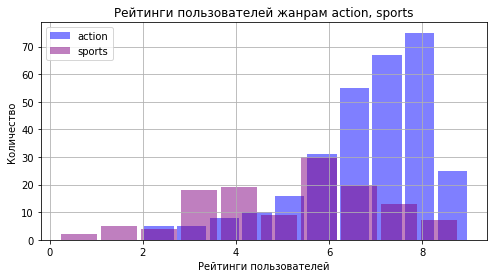

In [116]:
# график по оценкам платформы Xone
games_actual[(games_actual['genre'] == 'action') & (games_actual['user_score'] != -1)]['user_score']\
                .plot(kind='hist', bins=10, grid=True, alpha=0.5,\
                      rwidth=0.9, figsize=(8,4), color='blue', label='action')
# график по оценкам платформы PC
games_actual[(games_actual['genre'] == 'sports') & (games_actual['user_score'] != -1)]['user_score']\
                .plot(kind='hist', bins=10, grid=True, alpha=0.5,\
                      rwidth=0.9, figsize=(8,4), color='purple', label='sports')
plt.legend()
plt.title('Рейтинги пользователей жанрам action, sports')
plt.xlabel('Рейтинги пользователей')
plt.ylabel('Количество')
plt.show()

**Вывод:**  
Гипотеза о равенстве средних пользовательских рейтингов жанров action и sports отвергается, есть основания предполагать, что рейтинги разные. 

## Общий вывод

В ходе проделанной работы было выполнено:

* Изучены исходные данные.
* Проведена предобработка данных, в т.ч. корректировка типов данных, добавление доп. столбцов, обработка пропусков.
* Проведен исследовательский анализ данных, в ходе которого сделаны следующие выводы:  
 * С начала 90-х годов количество выпускаемых игр начинает расти. В 2000-х годах наступает расцвет видеоигр, резкий скачок заметен в районе 2002-2003 гг. Пик в 2008-2009 гг, количество релизов превышает 1400 ед. После начинается спад.
 * В лидерах по суммарным продажам - 6 платформ (PS2, X360, PS3, Wii, DS, PS).
 * Средний срок жизни игровой платформы - в районе 10 лет. 
 * Лидируют по продажам PS4 и XONE. Высокие продажи у PS3, X360, но они уже начали снижаться. В целом, практически все платформы находятся в стадии снижения показателей. Таким образом, потенциально прибыльными платформами можем считать: PS4, XONE, 3DS, а также PC как самую долгоживущую платформу.
 * На примере ps4 определили, что оценки пользователей никак не влияют на мировые продажи (продажи в "регионах" тоже). Некоторая зависимость между мировыми продажами и оценками критиков есть, но скорее слабая (слабоположительная). Выявленные тенденции применимы и к остальным платформам.
 * На первом месте по прибыльности и количеству это игры в жанре Action, их показатели в разы превышают показатели всех остальных жанров. На втором месте про продажам шутеры, третье, четвертое места у ролевых и спортивных игр. 
 * В регионе Северная Америка (NA) больше всего продаж у ps4 (34,7%), на втором месте - Xone (28,6%), на третьем X360 (10%). В Европе (EU) по продажам также лидирует PS4, но с большим перевесом 48% рынка, у Xone - 17.1%. В Японии с большим перевесом лидирует родная для их рынка - 3DS - 47,5% рынка.

 * В Северной Америке и Европе лидируют жанры action и shooter. А вот в Японии лидируют Role-Playing и Action здесь на втором месте.
 * В Северной Америке и Европе преобладают игры с рейтингом M ("Для взрослых"), на втором месте игры с рейтингом "E" (для всех). А вот в Японии больше половины это игры, которым не был присвоен рейтинг ESR. 
* Проверены гипотезы, в том числе:
 * Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC, которая не была отвергнута..
 * Гипотеза о равенстве средних пользовательских рейтингов жанров action и sports была отвергнута.
 

## Бонус

In [117]:
data_games = pd.read_csv('/datasets/games.csv')

In [118]:
data_games.columns = map(str.lower, data_games.columns)

In [119]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [120]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [121]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [122]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [123]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

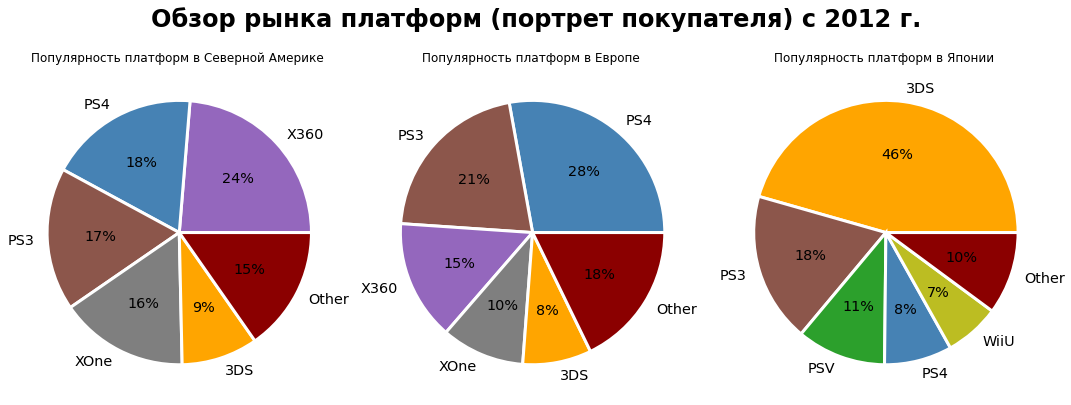

In [124]:
# check
# круги в ряд

x_year = 2012

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

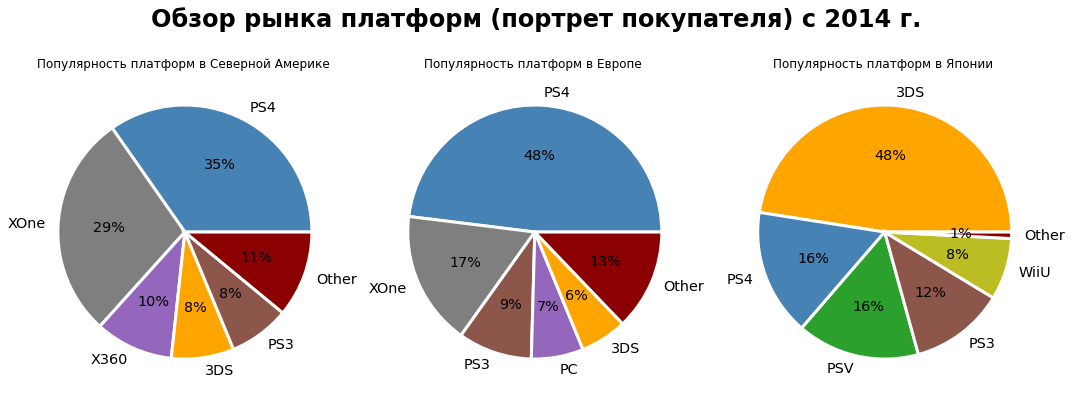

In [125]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 2015 год взят для акцентирования на изменении доли в продажах современных платформ

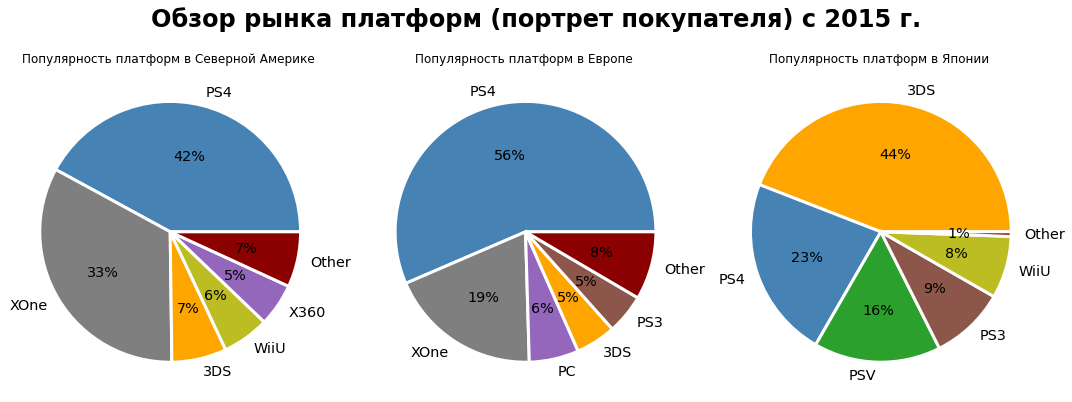

In [126]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])